In [16]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [9]:
# Load the Iris dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Loading and Preprocessing
We use the Iris dataset, which contains 150 samples with 4 features (sepal length, sepal width, petal length, petal width) and a target label indicating the species of iris. The dataset has three classes of species: `Iris-setosa`, `Iris-versicolor`, and `Iris-virginica`.


In [11]:
# Encode the target labels to integers
encoder = LabelEncoder()
data['species'] = encoder.fit_transform(data['species'])

# Convert target labels to one-hot encoded format
y = to_categorical(data['species'])

# Separate features and target labels
X = data.drop('species', axis=1).values

#### Label Encoding and One-Hot Encoding
To prepare the target labels for use in a neural network, we first encode them as integers, then convert these integer-encoded labels to one-hot encoded vectors.


In [12]:
# Shuffle the dataset
np.random.seed(0)  # for reproducibility
indices = np.random.permutation(len(X))
X, y = X[indices], y[indices]

#### Shuffling the Dataset
Randomly shuffling the data helps improve the generalization of the model. We use a random seed for reproducibility.


In [13]:
# Define the model
model = Sequential([
    Dense(10, input_shape=(4,), activation='relu'),  # Hidden layer
    Dense(3, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Building the Neural Network
We create a simple neural network with one hidden layer of 10 neurons and a ReLU activation function, followed by an output layer of 3 neurons with a softmax activation, representing the three classes of iris species. The model is compiled with the Adam optimizer and categorical cross-entropy loss function, suitable for multiclass classification tasks.


In [14]:
# Train the model with validation split
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=5, verbose=1)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2634 - loss: 4.0434 - val_accuracy: 0.3000 - val_loss: 3.1219
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2680 - loss: 2.6532 - val_accuracy: 0.3000 - val_loss: 2.0092
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3526 - loss: 1.6286 - val_accuracy: 0.4000 - val_loss: 1.1904
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5525 - loss: 0.9277 - val_accuracy: 0.6333 - val_loss: 0.7482
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7011 - loss: 0.6396 - val_accuracy: 0.7000 - val_loss: 0.6240
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8026 - loss: 0.5535 - val_accuracy: 0.8000 - val_loss: 0.5795
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9014 - loss: 0.5294 - val_accuracy: 0.9000 - val_loss: 0.5432
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9537 - loss: 0.5183 - val_accuracy: 0.9000 - 

### Model Training
The model is trained for 100 epochs with a batch size of 5. We use a validation split of 20% to evaluate the model's performance on unseen data.


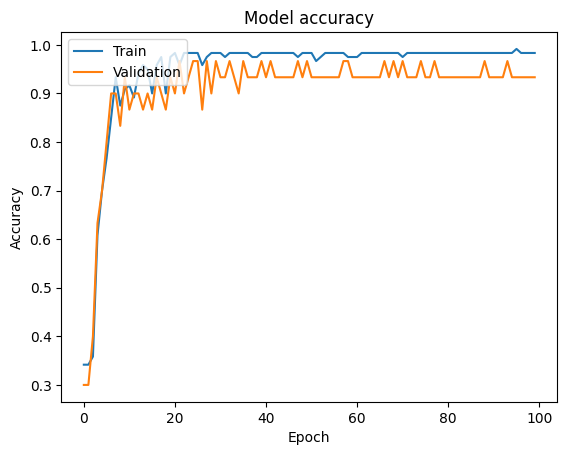

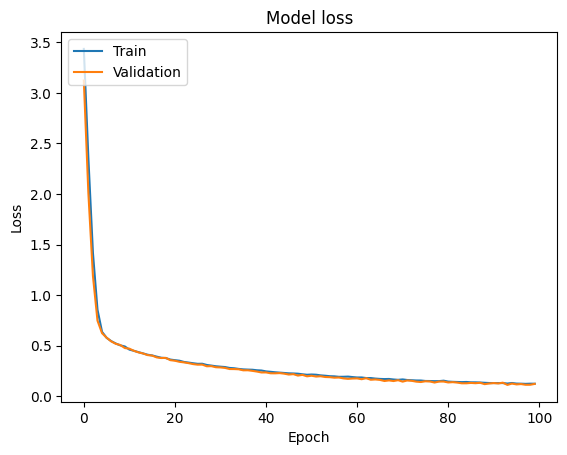

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### Model Evaluation
We visualize the training and validation accuracy and loss to analyze the learning progress of our model over epochs. The goal is to achieve approximately 95% accuracy in both training and validation, which would indicate a good fit.
